In [71]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [72]:
data_dir = '/Users/haniyacoub/Desktop/Tensor/04-CNNs/cell_images'

In [73]:
os.listdir(data_dir)

['test', 'train']

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [75]:
from matplotlib.image import imread

In [76]:
test_path = data_dir +'/test/'

train_path = data_dir +'/train/'

In [77]:
train_path

'/Users/haniyacoub/Desktop/Tensor/04-CNNs/cell_images/train/'

In [78]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [79]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [80]:
#Malaria Data set
#images of cells of which they are infected with malaria or not
#build a model that based on the image of a cell to see if a cell
#is infected or not

In [81]:
os.listdir(train_path + 'parasitized')[0]
#one picture

'C189P150ThinF_IMG_20151203_142224_cell_84.png'

In [82]:
para_cell = train_path + 'parasitized//'+'C189P150ThinF_IMG_20151203_142224_cell_84.png'


In [83]:
imread(para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [84]:
imread(para_cell).shape

(121, 118, 3)

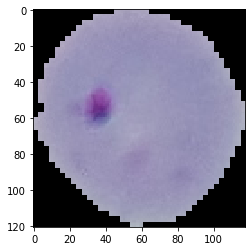

In [85]:
plt.imshow(imread(para_cell))

In [86]:
os.listdir(train_path+ 'uninfected')


['C13NThinF_IMG_20150614_131318_cell_179.png',
 'C205ThinF_IMG_20151106_152003_cell_21.png',
 'C230ThinF_IMG_20151112_150647_cell_1.png',
 'C134P95ThinF_IMG_20151005_121834_cell_65.png',
 'C141P102ThinF_IMG_20151005_214836_cell_132.png',
 'C182P143NThinF_IMG_20151201_171950_cell_93.png',
 'C181P142ThinF_IMG_20151127_160616_cell_54.png',
 'C142P103ThinF_IMG_20151005_223257_cell_18.png',
 'C80P41ThinF_IMG_20150817_110608_cell_62.png',
 'C144P105ThinF_IMG_20151015_163142_cell_66.png',
 'C12NThinF_IMG_20150614_124212_cell_187.png',
 'C223ThinF_IMG_20151112_104708_cell_190.png',
 'C143P104ThinF_IMG_20151005_225746_cell_133.png',
 'C84P45ThinF_IMG_20150818_101056_cell_87.png',
 'C222ThinF_IMG_20151115_150925_cell_127.png',
 'C1_thinF_IMG_20150604_104919_cell_82.png',
 'C150P111ThinF_IMG_20151115_115950_cell_53.png',
 'C170P131ThinF_IMG_20151119_120233_cell_183.png',
 'C13NThinF_IMG_20150614_131529_cell_168.png',
 'C1_thinF_IMG_20150604_104919_cell_96.png',
 'C150P111ThinF_IMG_20151115_115950

In [87]:
uninfected_cell = train_path + 'uninfected/' + 'C230ThinF_IMG_20151112_150647_cell_1.png'


In [88]:
uninfected_cell = imread(uninfected_cell)

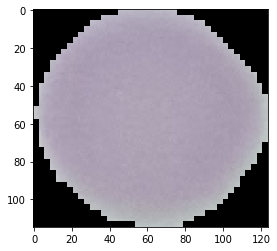

In [89]:
plt.imshow(uninfected_cell)

In [90]:
len(os.listdir(train_path+'parasitized'))

12480

In [91]:
len(os.listdir(train_path+'uninfected'))

12480

In [92]:
#average shape of all pictures 
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'uninfected'):
    
    img = imread(test_path+'uninfected/'+ image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

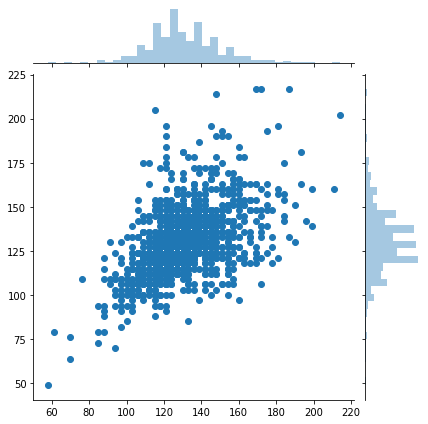

In [93]:
sns.jointplot(dim1,dim2)

In [94]:
#CNN cant train on images with diffrent sizes
#we should resize images with the mean value of dim 1 and dim 2
np.mean(dim1)

130.92538461538462

In [95]:
np.mean(dim2)

130.75

In [96]:
image_shape = (130,130,3)

In [97]:
#minuplate an image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [98]:
imread(para_cell).max()

0.78039217

In [99]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                               rescale=0,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest'
                              )

#numbers here depend on the situation

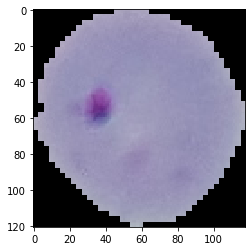

In [100]:
para_img = imread(para_cell)
plt.imshow(para_img)

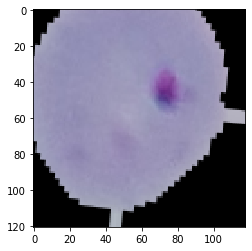

In [101]:
#now we apply the img_gen to the pictures
plt.imshow(image_gen.random_transform(para_img))

In [102]:
#powerfull tool to get more data.
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout, Flatten

In [104]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.


# Last layer, remember its binary so we use sigmoid
model.add(Dense(1,activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
          
          

In [105]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

In [106]:
from tensorflow.keras.callbacks import EarlyStopping

In [107]:
early_stop = EarlyStopping(monitor = 'val_loss',patience=2)

In [108]:
batch_size=16

In [109]:
train_image_gen = image_gen.flow_from_directory(train_path,target_size=image_shape[:2],color_mode='rgb'
                                               ,batch_size=batch_size,class_mode='binary')





Found 24958 images belonging to 2 classes.


In [110]:
test_image_gen = image_gen.flow_from_directory(test_path,target_size=image_shape[:2],color_mode='rgb'
                                               ,batch_size=batch_size,class_mode='binary',shuffle=False)





Found 2600 images belonging to 2 classes.


In [111]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [112]:
results = model.fit_generator(train_image_gen,epochs=20,
                             validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
 301/1560 [====>.........................] - ETA: 17:40 - loss: 7.8096 - accuracy: 0.4904

KeyboardInterrupt: 

In [43]:
from tensorflow.keras.models import load_model

In [44]:
model = load_model('malaria_detector.h5')

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [46]:
#model.history.history

In [47]:
#you can save the history of the training 
model.evaluate_generator(test_image_gen)

[1.9502192939178655, 0.87153846]

In [48]:
model.metrics_names

['loss', 'accuracy']

In [49]:
pred = model.predict_generator(test_image_gen)

In [50]:
pred

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [51]:
predictions = pred > 0.5
#make adjustments here 
#alert the docoor when its 80 percenate sure for exmaple
#0.8 80% sure that this image has 80% of having malaria 
#chnage threshold for docotor 

In [52]:
len(pred)

2600

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
test_image_gen.classes 

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [55]:
print (classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1300
           1       0.97      0.76      0.85      1300

    accuracy                           0.87      2600
   macro avg       0.89      0.87      0.87      2600
weighted avg       0.89      0.87      0.87      2600



In [56]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1273,   27],
       [ 310,  990]])

In [57]:
from tensorflow.keras.preprocessing import image 

In [58]:
my_image =image.load_img(para_cell,target_size=image_shape)

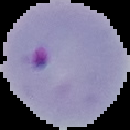

In [59]:
my_image

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [61]:
my_img_arr = image.img_to_array(my_image)

In [62]:
my_img_arr.shape

(130, 130, 3)

In [63]:
#resize this 
my_img_arr = np.expand_dims(my_img_arr ,axis=0)

In [64]:
my_img_arr.shape

(1, 130, 130, 3)

In [65]:
model.predict(my_img_arr)

array([[0.]], dtype=float32)